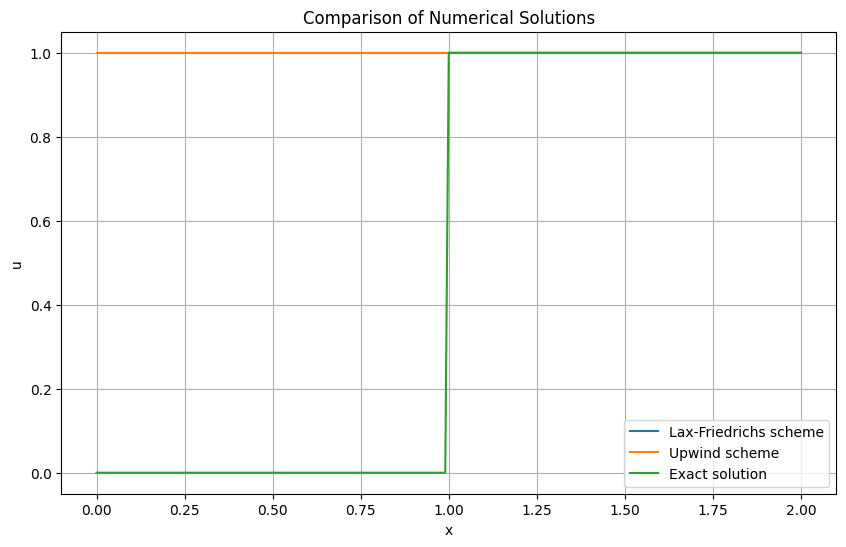

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Определение констант и параметров
a = 1.0
x0 = 0.0
x1 = 2.0
u0 = 1.0
T = 1.0
dx = 0.01
dt = 0.001

# Функция точного решения уравнения переноса
def exact_solution(x, t):
    return u0 if x - a * t >= x0 and x - a * t <= x1 else 0

# Численный метод - схема Лакса
def lax_friedrichs(u, dx, dt):
    unew = np.copy(u)
    for i in range(1, len(u) - 1):
        unew[i] = 0.5 * (u[i+1] + u[i-1]) - 0.5 * a * dt / dx * (u[i+1] - u[i-1])
    return unew

# Численный метод - правый уголок
def upwind(u, dx, dt):
    unew = np.copy(u)
    for i in range(1, len(u) - 1):
        unew[i] = u[i] - a * dt / dx * (u[i] - u[i-1])
    return unew

# Создание сетки по x и t
x = np.arange(0, 2 + dx, dx)
t = np.arange(0, T + dt, dt)

# Инициализация начального состояния
u_lax = np.zeros_like(x)
u_upwind = np.zeros_like(x)
u_exact = np.zeros_like(x)
for i in range(len(u_lax)):
    u_lax[i] = u0 if x[i] >= x0 and x[i] <= x1 else 0
    u_upwind[i] = u0 if x[i] >= x0 and x[i] <= x1 else 0
    u_exact[i] = exact_solution(x[i], 0)

# Цикл по времени для численного решения
for ti in t:
    u_lax = lax_friedrichs(u_lax, dx, dt)
    u_upwind = upwind(u_upwind, dx, dt)

# Вычисление точного решения для последнего момента времени
for i in range(len(u_exact)):
    u_exact[i] = exact_solution(x[i], T)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(x, u_lax, label='Lax-Friedrichs scheme')
plt.plot(x, u_upwind, label='Upwind scheme')
plt.plot(x, u_exact, label='Exact solution')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Comparison of Numerical Solutions')
plt.legend()
plt.grid()
plt.show()
